<a href="https://colab.research.google.com/github/asadyousuf-dare/Thesis-work/blob/main/Fire_Engineering_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

The code below will get the dataset we'll use for this demo of basic classification.

In [2]:
%ls

sample_data/


In [3]:
!wget https://gist.githubusercontent.com/jelledebock/808f9fd870f851459cc5a869692532a4/raw/835fd6ab2f01c2073ffb90a788d0bde034d6ae0b/forestfires.csv

--2022-03-23 01:28:12--  https://gist.githubusercontent.com/jelledebock/808f9fd870f851459cc5a869692532a4/raw/835fd6ab2f01c2073ffb90a788d0bde034d6ae0b/forestfires.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24601 (24K) [text/plain]
Saving to: ‘forestfires.csv’

forestfires.csv     100%[===================>]  24.02K  --.-KB/s    in 0.001s  

2022-03-23 01:28:12 (17.7 MB/s) - ‘forestfires.csv’ saved [24601/24601]



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls

drive  forestfires.csv	sample_data


# Classification

### The dataset
```forestfires.csv```

Source:[ https://archive.ics.uci.edu/ml/datasets/forest+fires ](https://archive.ics.uci.edu/ml/datasets/forest+fires)

About the columns in our dataset:
*  **X** :  x-axis spatial coordinate within the Montesinho park map: 1 to 9
*  **Y**:   y-axis spatial coordinate within the Montesinho park map: 2 to 9
*  **month**: month of the year: "jan" to "dec"
* **day**: day of the week: "mon" to "sun"
* **FFMC**: Fine Fuel Moisture Code index from the FWI system: 18.7 to 96.20
* **DMC**: Duff moisture code index from the FWI system: 1.1 to 291.3
* **DC**: Drought Code index from the FWI system: 7.9 to 860.6
* **ISI**: Initial Spread index index from the FWI system: 0.0 to 56.10
* **temp**: temperature in Celsius degrees: 2.2 to 33.30
* **RH**: relative humidity in %: 15.0 to 100
* **wind**: wind speed in km/h: 0.40 to 9.40
* **rain**: outside rain in mm/m2 : 0.0 to 6.4
* **forestfire**: indicates if the particular area has faced a forestfire (i.e. the ground truth)

For more information about FFMC, DMC, DC and ISI, visit https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi for useful information.

## Data loading and preparation

We'll use Pandas and scipy for this purpose.

In [6]:
import pandas as pd

fire_df = pd.read_csv('forestfires.csv')
fire_df.head(3)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,forestfire
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0


### Mapping month and day abbreviations to indices

It is easier for scipy to work with numerical values rather than strings.

In [7]:
import calendar

month_abbrev_to_index = {v: k for k,v in enumerate(calendar.month_abbr)}
day_abbrev_to_index = {v: k for k,v in enumerate(calendar.day_abbr)}

fire_df['month']=fire_df['month'].apply(lambda x: month_abbrev_to_index[x.capitalize()])
fire_df['day']=fire_df['day'].apply(lambda x: day_abbrev_to_index[x.capitalize()])


In [ ]:
fire_df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,forestfire
0,7,5,3,4,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,7,4,10,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,7,4,10,5,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,8,6,3,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
4,8,6,3,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0


### Some data exploration

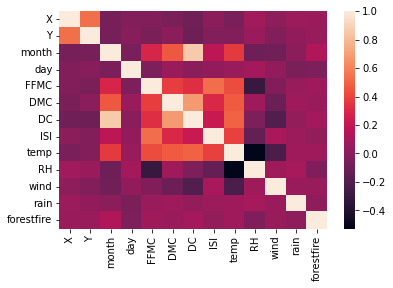

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(fire_df.corr());

In [9]:
fire_df_zone_number_of_fires = fire_df[['X','Y','forestfire']]
counts = fire_df_zone_number_of_fires.groupby(['X', 'Y']).count().reset_index()

In [10]:
import numpy as np

z_array = np.nan * np.empty((9,8))
y = counts['Y'].apply(lambda x: x-2)
x = counts['X'].apply(lambda x: x-1)
z = counts['forestfire']

z_array[x, y] = z


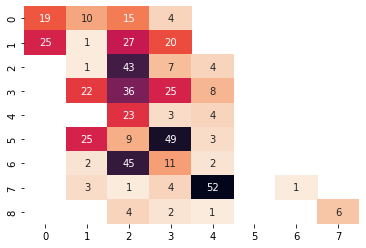

In [11]:
cmap = sns.cm.rocket_r
sns.heatmap(z_array, annot=True, cmap = cmap, cbar=False)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
fire_df[['FFMC', 'DMC','DC','ISI','temp','RH','wind','rain']] = scaler.fit_transform(fire_df[['FFMC', 'DMC','DC','ISI','temp','RH','wind','rain']])
fire_df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,forestfire
0,7,5,3,4,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0
1,7,4,10,1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0
2,7,4,10,5,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0
3,8,6,3,4,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0
4,8,6,3,6,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0


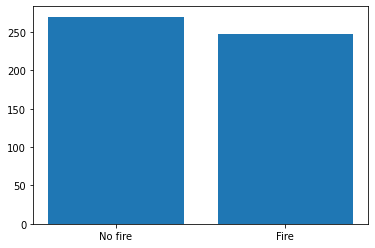

In [13]:
import numpy as np
import matplotlib.pyplot as plt
 
# Make a fake dataset:
values = pd.value_counts(fire_df.forestfire).to_frame().reset_index()

bars = ('No fire', 'Fire')
y_pos = np.arange(len(bars))
height = values.iloc[:,1]

# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

### Split our data in training and test (verification) parts

In [14]:
X = fire_df.drop('forestfire', axis=1)
Y = fire_df['forestfire']

In [15]:
X.shape


(517, 12)

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### A first approach a relatively simple Support Vector Machine


In [17]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/Y6RRHw9uN9o" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

def run_svm(kernel_, degree_, C_, max_iter_):
  model = SVC(degree=int(degree_), kernel=kernel_, C=float(C_), gamma='scale', max_iter=float(max_iter_), random_state=1)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  accuracy =  accuracy_score(y_test, y_pred) * 100
  conf_matrix = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = conf_matrix.ravel()
  
  print("Total number of test elements: ", len(y_test))
  ax= plt.subplot()
  sns.heatmap(conf_matrix, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('Ground truth')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(['no fire', 'fire'])
  ax.yaxis.set_ticklabels(['no fire', 'fire'])
  
  print("Accuracy of our trained model {}".format(accuracy))
  
y = interactive(run_svm, kernel_={'poly':'poly', 'linear':'linear','rbf':'rbf', 'sigmoid':'sigmoid'}, degree_=(1,10), C_=(0.01,1.0), max_iter_=(1,1000))
display(y)

interactive(children=(Dropdown(description='kernel_', options={'poly': 'poly', 'linear': 'linear', 'rbf': 'rbf…

### Basic decision tree

In [19]:
from sklearn import tree
from sklearn.metrics import accuracy_score

def run_dt(criterion_, splitter_, max_depth_):
  model = tree.DecisionTreeClassifier(criterion=criterion_, splitter=splitter_, max_depth=max_depth_,random_state=1)
  model.fit(X_train, y_train)
  
  y_pred = model.predict(X_test)
  accuracy =  accuracy_score(y_test, y_pred) * 100
  conf_matrix = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = conf_matrix.ravel()
  
  print("Total number of test elements: ", len(y_test))
  ax= plt.subplot()
  sns.heatmap(conf_matrix, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('Ground truth')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(['no fire', 'fire'])
  ax.yaxis.set_ticklabels(['no fire', 'fire'])
  print("Accuracy of our trained model {}".format(accuracy))
y = interactive(run_dt, criterion_={'entropy':'entropy', 'gini':'gini'}, splitter_={'random':'random', 'best':'best'}, max_depth_=(1,50))
display(y)



interactive(children=(Dropdown(description='criterion_', options={'entropy': 'entropy', 'gini': 'gini'}, value…

### XGBoost

Total number of test elements:  104
Accuracy of our trained model 55.769230769230774


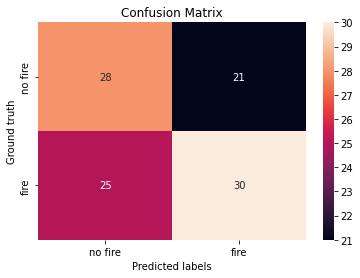

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy =  accuracy_score(y_test, y_pred) * 100
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
  
print("Total number of test elements: ", len(y_test))
ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Ground truth')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['no fire', 'fire'])
ax.yaxis.set_ticklabels(['no fire', 'fire'])

print("Accuracy of our trained model {}".format(accuracy))

### Neural Network

In [21]:
from sklearn.neural_network import MLPClassifier

def run_nn(activation_, solver_, learning_rate_, max_iter_,hidden_layer_size_):
  model = MLPClassifier(hidden_layer_sizes=(hidden_layer_size_,), activation=activation_, random_state=0, solver=solver_, learning_rate=learning_rate_, max_iter=max_iter_)
  model.fit(X_train, y_train)
  
  y_pred = model.predict(X_test)
  accuracy =  accuracy_score(y_test, y_pred) * 100
  conf_matrix = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = conf_matrix.ravel()
  
  print("Total number of test elements: ", len(y_test))
  ax= plt.subplot()
  sns.heatmap(conf_matrix, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('Ground truth')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(['no fire', 'fire'])
  ax.yaxis.set_ticklabels(['no fire', 'fire'])
  print("Accuracy of our trained model {}".format(accuracy))
  
y = interactive(run_nn, activation_={'identity':'identity', 'logistic':'logistic','tanh':'tanh','relu':'relu'},
               solver_={'lbfgs':'lbfgs','sgd':'sgd', 'adam':'adam'},
               learning_rate_={'constant','invscaling','adaptive'},
               max_iter_=(0,1000),
               hidden_layer_size_=(100,1000))
display(y)


interactive(children=(Dropdown(description='activation_', options={'identity': 'identity', 'logistic': 'logist…

### SGD

Total number of test elements:  104
Accuracy of our trained model 48.07692307692308


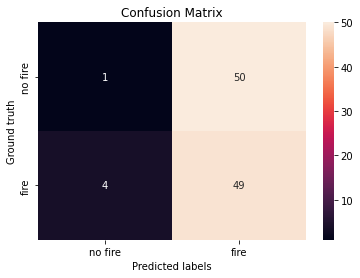

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(SGDClassifier())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy =  accuracy_score(y_test, y_pred) * 100  

conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
  
print("Total number of test elements: ", len(y_test))
ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Ground truth')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['no fire', 'fire'])
ax.yaxis.set_ticklabels(['no fire', 'fire'])
  
print("Accuracy of our trained model {}".format(accuracy))

### Nearest neighbors

In [ ]:
from sklearn import neighbors

def run_nearest_neighbors(n_neighbors_, weights_, algorithm_):
  model = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors_, weights=weights_, algorithm=algorithm_)
  model.fit(X_train, y_train)
  
  y_pred = model.predict(X_test)
  accuracy =  accuracy_score(y_test, y_pred) * 100
  conf_matrix = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = conf_matrix.ravel()
  
  print("Total number of test elements: ", len(y_test))
  ax= plt.subplot()
  sns.heatmap(conf_matrix, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('Ground truth')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(['no fire', 'fire'])
  ax.yaxis.set_ticklabels(['no fire', 'fire'])
  print("Accuracy of our trained model {}".format(accuracy))
  
y = interactive(run_nearest_neighbors, n_neighbors_=(1,20),weights_={'uniform','distance'},
               algorithm_={'ball_tree','kd_tree','brute','auto'})
display(y)

interactive(children=(IntSlider(value=10, description='n_neighbors_', max=20, min=1), Dropdown(description='we…

### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'min_samples_split': [17,18,19,20,21,22,23,24,25], 
    'n_estimators' : [10,20,30,40,50],
    'max_depth': [11,21,31],
    'max_features': [1,2,3,4]
}

clf = RandomForestClassifier(n_jobs=-1, random_state = 42, criterion = "gini")

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(clf, param_grid, scoring="accuracy",
                           cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)

# make the predictions
y_pred = grid_search.predict(X_test)

print(grid_search.best_params_)

{'max_depth': 21, 'max_features': 1, 'min_samples_split': 18, 'n_estimators': 10}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

def run_rf(n_estimators_):
  model = RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators_, random_state=42, max_depth=11, max_features=2, min_samples_split=17, criterion="gini")
  model.fit(X_train, y_train)
  
  y_pred = model.predict(X_test)
  accuracy =  accuracy_score(y_test, y_pred) * 100
  conf_matrix = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = conf_matrix.ravel()
  
  print("Total number of test elements: ", len(y_test))
  ax= plt.subplot()
  sns.heatmap(conf_matrix, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('Ground truth')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(['no fire', 'fire'])
  ax.yaxis.set_ticklabels(['no fire', 'fire'])
  print("Accuracy of our trained model {}".format(accuracy))
  
y = interactive(run_rf, n_estimators_=(50,200))
display(y)

interactive(children=(IntSlider(value=125, description='n_estimators_', max=200, min=50), Output()), _dom_clas…

### A HANDY FUCNCTION WHICH PERFORMS ALL TECHNIQUES AND OUTPUTS ACCURACIES

In [22]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

def all_models(X_train, y_train, X_test, y_test):
  # SVM
  svm_model = SVC(kernel='sigmoid', C=0.51, gamma='scale', max_iter=500, random_state=0)
  svm_model.fit(X_train, y_train)

  y_pred = svm_model.predict(X_test)
  svm_accuracy =  accuracy_score(y_test, y_pred) * 100

  print("SVM: {}".format(svm_accuracy))
  
  # Decision tree
  dt_model = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=7, random_state=0)
  dt_model.fit(X_train, y_train)

  y_pred = dt_model.predict(X_test)
  dt_accuracy =  accuracy_score(y_test, y_pred) * 100

  print("Decision tree: {}".format(dt_accuracy))
  
  # XGBoost
  xgb_model = XGBClassifier()
  xgb_model.fit(X_train, y_train)

  y_pred = xgb_model.predict(X_test)
  xgb_accuracy =  accuracy_score(y_test, y_pred) * 100

  print("XGBoost {}".format(xgb_accuracy))
  
  # Neural Net
  mlp_model = MLPClassifier(hidden_layer_sizes=(782,), activation='tanh', solver='sgd', learning_rate='adaptive', max_iter=500, random_state=0)

  mlp_model.fit(X_train, y_train)

  y_pred = mlp_model.predict(X_test)
  cnn_accuracy =  accuracy_score(y_test, y_pred) * 100

  print("Multilayer Perceptron Neural Network: {}".format(cnn_accuracy))

  # SGD
  sgd_model = OneVsRestClassifier(SGDClassifier())
  sgd_model.fit(X_train, y_train)

  y_pred = sgd_model.predict(X_test)
  sgd_accuracy =  accuracy_score(y_test, y_pred) * 100

  print("SGD: {}".format(sgd_accuracy))
  
  # Nearest neigbors
  nn_model = neighbors.KNeighborsClassifier(n_neighbors=2, weights='uniform', algorithm='auto')
  nn_model.fit(X_train, y_train)

  y_pred = nn_model.predict(X_test)
  nn_accuracy =  accuracy_score(y_test, y_pred) * 100

  print("Nearest neighbor {}".format(nn_accuracy))
  
  # Random forest
  rf_model = RandomForestClassifier(n_estimators=200, random_state=0)
  rf_model.fit(X_train, y_train)

  y_pred = rf_model.predict(X_test)
  rf_accuracy =  accuracy_score(y_test, y_pred) * 100

  print("Random forest: {}".format(rf_accuracy))
  
  return svm_accuracy, dt_accuracy, xgb_accuracy, cnn_accuracy, sgd_accuracy ,nn_accuracy, rf_accuracy

## Can we further improve the results

Let's scale our input.

In [ ]:
all_accuracies = {}

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
print(X_scaled.shape)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.33, random_state=0)

(517, 12)


In [ ]:
svm_accuracy, dt_accuracy, xgb_accuracy, cnn_accuracy, sgd_accuracy ,nn_accuracy, rf_accuracy = all_models(X_train, y_train, X_test, y_test)

all_accuracies['Scaled']=[svm_accuracy, dt_accuracy, xgb_accuracy, cnn_accuracy, sgd_accuracy ,nn_accuracy, rf_accuracy]

SVM: 53.80116959064327
Decision tree: 46.783625730994146
XGBoost 59.06432748538012
Multilayer Perceptron Neural Network: 51.461988304093566
SGD: 49.707602339181285
Nearest neighbor 47.953216374269005
Random forest: 53.80116959064327


Scale only a selection of columns

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = X.copy()
X_scaled[['FFMC', 	'DMC', 	'DC', 	'ISI', 	'temp', 	'RH', 	'wind', 	'rain']]=sc.fit_transform(X_scaled[['FFMC', 	'DMC', 	'DC', 	'ISI', 	'temp', 	'RH', 	'wind', 	'rain']])


X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.33, random_state=0)


In [ ]:
svm_accuracy, dt_accuracy, xgb_accuracy, cnn_accuracy, sgd_accuracy ,nn_accuracy, rf_accuracy = all_models(X_train, y_train, X_test, y_test)

all_accuracies['Only non-location values scaled']=[svm_accuracy, dt_accuracy, xgb_accuracy, cnn_accuracy, sgd_accuracy ,nn_accuracy, rf_accuracy]

SVM: 55.55555555555556
Decision tree: 46.783625730994146
XGBoost 59.06432748538012
Multilayer Perceptron Neural Network: 53.216374269005854
SGD: 52.046783625730995
Nearest neighbor 52.63157894736842
Random forest: 53.216374269005854


Drop X and Y columns

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_dropped_scaled = X[['month', 'day', 'FFMC', 	'DMC', 	'DC', 	'ISI', 	'temp', 	'RH', 	'wind', 	'rain']]
X_dropped_scaled = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_dropped_scaled, Y, test_size=0.33, random_state=0)


In [ ]:
svm_accuracy, dt_accuracy, xgb_accuracy, cnn_accuracy, sgd_accuracy ,nn_accuracy, rf_accuracy = all_models(X_train, y_train, X_test, y_test)

all_accuracies['Location dropped']=[svm_accuracy, dt_accuracy, xgb_accuracy, cnn_accuracy, sgd_accuracy ,nn_accuracy, rf_accuracy]

SVM: 53.80116959064327
Decision tree: 46.783625730994146
XGBoost 59.06432748538012
Multilayer Perceptron Neural Network: 51.461988304093566
SGD: 37.42690058479532
Nearest neighbor 47.953216374269005
Random forest: 53.80116959064327


"More training data" (i.e. reduce test_size)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)

In [ ]:
svm_accuracy, dt_accuracy, xgb_accuracy, cnn_accuracy, sgd_accuracy ,nn_accuracy, rf_accuracy = all_models(X_train, y_train, X_test, y_test)

all_accuracies['More training less testing']=[svm_accuracy, dt_accuracy, xgb_accuracy, cnn_accuracy, sgd_accuracy ,nn_accuracy, rf_accuracy]

SVM: 50.96153846153846
Decision tree: 56.730769230769226
XGBoost 57.692307692307686
Multilayer Perceptron Neural Network: 54.807692307692314
SGD: 39.42307692307692
Nearest neighbor 40.38461538461539
Random forest: 54.807692307692314


Combining X and Y



In [ ]:
fire_df['location']=fire_df['X']*fire_df['Y']
fire_df_loc = fire_df.drop(columns=['X','Y'])

X_loc = fire_df_loc.drop('forestfire', axis=1)
Y_loc = fire_df_loc['forestfire']

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X_loc)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_loc, test_size=0.2, random_state=0)

In [ ]:
svm_accuracy, dt_accuracy, xgb_accuracy, cnn_accuracy, sgd_accuracy ,nn_accuracy, rf_accuracy = all_models(X_train, y_train, X_test, y_test)

all_accuracies['XY combined']=[svm_accuracy, dt_accuracy, xgb_accuracy, cnn_accuracy, sgd_accuracy ,nn_accuracy, rf_accuracy]

SVM: 55.769230769230774
Decision tree: 57.692307692307686
XGBoost 50.96153846153846
Multilayer Perceptron Neural Network: 58.65384615384615
SGD: 60.57692307692307
Nearest neighbor 45.19230769230769
Random forest: 55.769230769230774


## Comparing results for different techniques and different data filtering strategies

In [ ]:
labels = ['svm_accuracy', 'dt_accuracy', 'xgb_accuracy', 'cnn_accuracy', 'sgd_accuracy' ,'nn_accuracy', 'rf_accuracy']

In [ ]:
 # libraries
import numpy as np
import matplotlib.pyplot as plt
import random

def generate_colors(n):
  color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])for i in range(n)]
  return color

def make_bar_plot(all_accuracies):
  hex_values = generate_colors(len(labels))
  plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

  number_of_scenarios = len(all_accuracies)
  # set width of bar
  barWidth = 1.0/number_of_scenarios

  scenarios=[None]*number_of_scenarios
  bar_positions = [None]*number_of_scenarios

  curr_index = 0
  key = 0
  bar_positions[0]=np.arange(len(labels))*2
  for key in all_accuracies:
    if curr_index>0:
      bar_positions[curr_index]= [x + barWidth for x in bar_positions[curr_index-1]]      
    plt.bar(bar_positions[curr_index], all_accuracies[key], color=hex_values[curr_index], width=barWidth, edgecolor='white', label=key)
    curr_index+=1

  # Add xticks on the middle of the group bars
  plt.xlabel('Technique used', fontweight='bold')
  plt.ylabel('Accuracy (%)', fontweight='bold')

  label_positions = []
  curr_index = 0
  for index in range(0, len(bar_positions[0])):
    pos = bar_positions[0][index]+barWidth*int(number_of_scenarios/2)
    label_positions.append(pos)
    curr_index+=1

  plt.xticks([r for r in label_positions], labels)


  # Create legend & Show graphic
  plt.tight_layout()
  plt.legend()
  plt.show()

**The code above will render a nice barplot allowing comparison of accuracies of different classification mechanisms and different data filtering and preprocessing strategies**

We will now try them on the previously gathered accuracies.

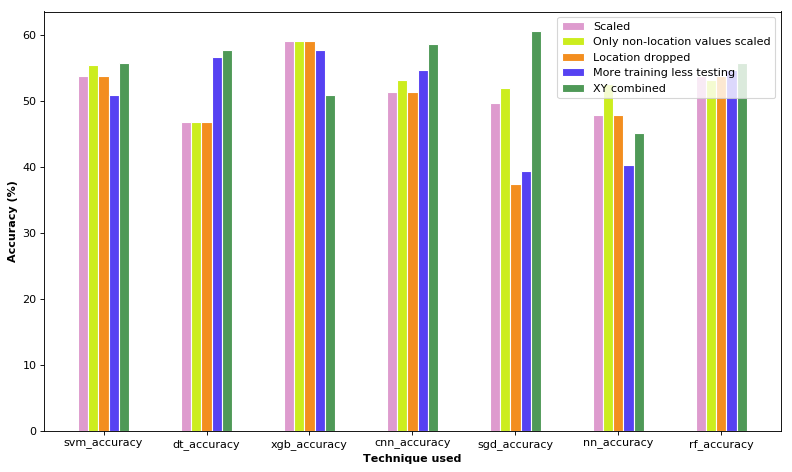

In [ ]:
make_bar_plot(all_accuracies)